# Программирование на языке Python
## Семинар 12. Pandas

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('zomato.csv', encoding='Windows-1251')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### Задача
Имея сырые данные, сгенерировать как можно большее количество полезных фичей для предсказания оценки ресторана.

**1. Исследуем таргет**

Таргет - 'Aggregate Rating'

In [4]:
# Заметки
#1 значительное количество оценок 0 у ресторана

In [5]:
# Действия
#1 - filter by "Rating text": remove 'Not rated'
#2 - скорректировать ли таргет на количество наблюдений?
#3 - убрать пропущенные значения по переменной Cuisines	

In [6]:
df['Country Code'].value_counts(dropna=False)

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

In [7]:
df['Aggregate rating'].describe().round(2)

count    9551.00
mean        2.67
std         1.52
min         0.00
25%         2.50
50%         3.20
75%         3.70
max         4.90
Name: Aggregate rating, dtype: float64

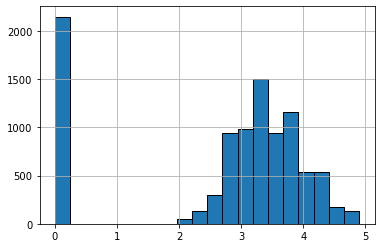

In [8]:
df['Aggregate rating'].hist(edgecolor='black', bins=20);

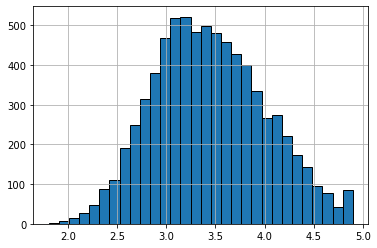

In [9]:
df.loc[df['Aggregate rating'] != 0, 'Aggregate rating'].hist(edgecolor='black', bins=30);

In [10]:
#1
df.loc[df['Aggregate rating'] == 0, :].shape

(2148, 21)

In [11]:
df.loc[df['Aggregate rating'] == 0, :].shape

(2148, 21)

In [12]:
(df.loc[df['Rating text'] == 'Not rated', 'Aggregate rating'] == 0).all()

True

**2. Исследуем фичи**

- Restaurant Name - может пригодится, особенно если подключить NLP (оставить только слова, убрать все лишние символы);
- Country Code - пригодится в качестве дамми-переменной (надо перевести страны в названия);
- Address - берем (тут нужно отдельное исследование)
- Longitude - берем без изменений
- Latitude - берем без изменений
- Cuisines - берем (тут нужно отдельное исследование)
- Average Cost for two - берем, но приводим к единой валюте
- Has Table booking:Switch to order menu
- Price range - берем

In [13]:
data = df[df['Rating text'] != 'Not rated'].reset_index(drop=True)

In [23]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,5915730,NamlЫ± Gurme,208,ЫБstanbul,"KemankeЃф Karamustafa PaЃфa Mahallesi, RЫ±htЫ±...",Karakн_y,"Karakн_y, ЫБstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
7399,5908749,Ceviz AЫфacЫ±,208,ЫБstanbul,"KoЃфuyolu Mahallesi, Muhittin нмstн_ndaЫф Cadd...",KoЃфuyolu,"KoЃфuyolu, ЫБstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
7400,5915807,Huqqa,208,ЫБstanbul,"Kuruн_eЃфme Mahallesi, Muallim Naci Caddesi, N...",Kuruн_eЃфme,"Kuruн_eЃфme, ЫБstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
7401,5916112,AЃфЃфk Kahve,208,ЫБstanbul,"Kuruн_eЃфme Mahallesi, Muallim Naci Caddesi, N...",Kuruн_eЃфme,"Kuruн_eЃфme, ЫБstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


#### Cuisines

In [15]:
cuisines_nested = data['Cuisines'].dropna().str.split(', ').tolist()
cuisines = pd.Series([c for lst in cuisines_nested for c in lst])

cuisines_counts = cuisines.value_counts()

cuisines_to_remove = cuisines_counts.index[cuisines_counts.values < 50]

In [16]:
cuisines_counts[cuisines_counts.values >= 50]

North Indian     3017
Chinese          2184
Fast Food        1563
Mughlai           794
Italian           726
Continental       699
Cafe              634
Desserts          543
Bakery            536
South Indian      485
Street Food       403
American          380
Pizza             328
Mithai            251
Burger            239
Thai              229
Asian             228
Beverages         177
Mexican           174
Seafood           171
Ice Cream         169
European          146
Healthy Food      137
Japanese          134
Biryani           126
Mediterranean     110
Finger Food       106
Salad              91
Raw Meats          80
Sushi              75
Indian             66
Lebanese           65
Steak              62
Sandwich           53
dtype: int64

In [17]:
cuisines_to_remove

Index(['Breakfast', 'Bar Food', 'Tea', 'BBQ', 'Tibetan', 'French',
       'Hyderabadi', 'Bengali', 'Arabian', 'Southern',
       ...
       'Malwani', 'Persian', 'Armenian', 'Soul Food', 'Irish', 'Bubble Tea',
       'Canadian', 'Gourmet Fast Food', 'Peruvian', 'Bн_rek'],
      dtype='object', length=109)

In [28]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [25]:
country_codes = pd.read_excel('Country-Code.xlsx')
country_codes

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [27]:
data_model = data.merge(country_codes, on = ['Country Code'], how = 'left')
data_model

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,5915730,NamlЫ± Gurme,208,ЫБstanbul,"KemankeЃф Karamustafa PaЃфa Mahallesi, RЫ±htЫ±...",Karakн_y,"Karakн_y, ЫБstanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
7399,5908749,Ceviz AЫфacЫ±,208,ЫБstanbul,"KoЃфuyolu Mahallesi, Muhittin нмstн_ndaЫф Cadd...",KoЃфuyolu,"KoЃфuyolu, ЫБstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
7400,5915807,Huqqa,208,ЫБstanbul,"Kuruн_eЃфme Mahallesi, Muallim Naci Caddesi, N...",Kuruн_eЃфme,"Kuruн_eЃфme, ЫБstanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
7401,5916112,AЃфЃфk Kahve,208,ЫБstanbul,"Kuruн_eЃфme Mahallesi, Muallim Naci Caddesi, N...",Kuruн_eЃфme,"Kuruн_eЃфme, ЫБstanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [29]:
data_model.groupby(['Has Table booking']).size()

Has Table booking
No     6292
Yes    1111
dtype: int64

In [30]:
dummy_mapper = {'Yes':1,'No':0}
data_model.loc[:,'Has Table booking':'Switch to order menu'] = data_model.loc[:,'Has Table booking':'Switch to order menu'].apply(
lambda col: col.map(dummy_mapper))

In [32]:
data_model.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,Phillipines


In [34]:
data_model['Count Cuisines'] = data_model['Cuisines'].str.count(',')+1
data_model.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Count Cuisines
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,Phillipines,3.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,Phillipines,1.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,Phillipines,4.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,Phillipines,2.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,Phillipines,2.0


In [35]:
data_model[['Country', 'Currency']].groupby(['Country', 'Currency']).size()

Country         Currency              
Australia       Dollar($)                   24
Brazil          Brazilian Real(R$)          55
Canada          Dollar($)                    4
India           Indian Rupees(Rs.)        6513
Indonesia       Indonesian Rupiah(IDR)      21
New Zealand     NewZealand($)               40
Phillipines     Botswana Pula(P)            22
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
South Africa    Rand(R)                     60
Sri Lanka       Sri Lankan Rupee(LKR)       20
Turkey          Turkish Lira(TL)            34
UAE             Emirati Diram(AED)          60
United Kingdom  Pounds(ЊЈ)                  79
United States   Dollar($)                  431
dtype: int64

In [37]:
conversion_rating = { 'Dollar($)':1,
                      'Brazilian Real(R$)':0.2,
                      'Indian Rupees(Rs.)':0.01,
                      'Indonesian Rupiah(IDR)':0.000064,
                      'NewZealand($)':0.58,
                      'Botswana Pula(P)':0.07,
                      'Qatari Rial(QR)':0.275,
                      'Rand(R)':0.052,
                      'Sri Lankan Rupee(LKR)':0.031,
                      'Turkish Lira(TL)':0.035,
                      'Emirati Diram(AED)':0.27,
                      'Pounds(ЊЈ)':1.21
                    }


In [38]:
data_model['Avg cost'] = data_model['Average Cost for two']*data_model['Currency'].map(conversion_rating)

In [40]:
data_model.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Count Cuisines,Avg cost
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,Phillipines,3.0,77.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,Phillipines,1.0,84.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,Phillipines,4.0,280.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,Phillipines,2.0,105.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,Phillipines,2.0,105.0


<AxesSubplot:ylabel='Country'>

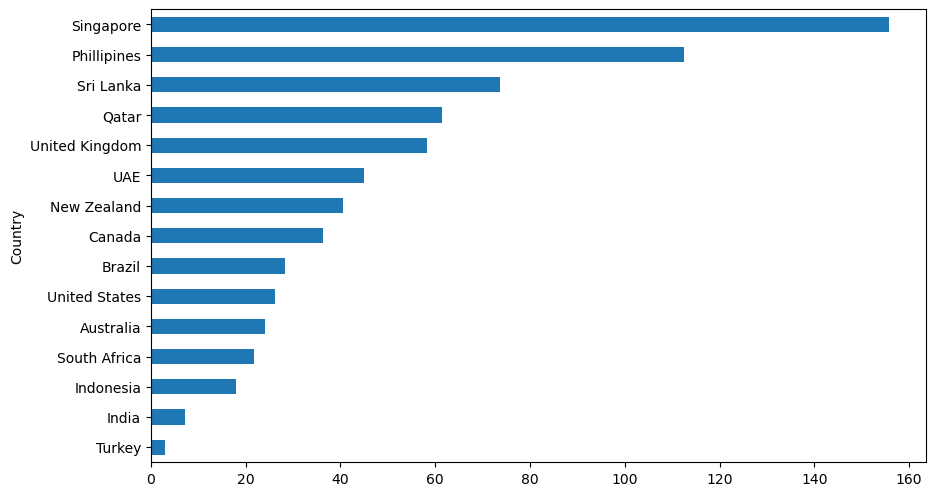

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5),dpi = 100)
data_model.groupby(['Country']).mean()['Avg cost'].sort_values().plot(kind = 'barh', figsize = (10,6))

In [41]:
def continent(x):
    if (x in ['United States', 'Canada', 'Brazil']):
        return ('America')
    elif (x in ['India','Phillipines','Sri Lanka','UAE','Indonesia','Qatar','Singapore']):
        return ('Asia')
    elif (x in ['Australia', 'New Zealand']):
        return ('Australia_continent')
    elif (x in ['Turkey', 'United Kingdom']):
        return ('Europe')
    else:
        return ('Africa')

In [42]:
data_model['Continent'] = data_model['Country'].apply(continent)
data_model.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Count Cuisines,Avg cost,Continent
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,Phillipines,3.0,77.0,Asia
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,Phillipines,1.0,84.0,Asia
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,Phillipines,4.0,280.0,Asia
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,Phillipines,2.0,105.0,Asia
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,Phillipines,2.0,105.0,Asia


In [46]:
data_model.groupby(['Aggregate rating','Rating color','Rating text']).size()

Aggregate rating  Rating color  Rating text
1.8               Red           Poor             1
1.9               Red           Poor             2
2.0               Red           Poor             7
2.1               Red           Poor            15
2.2               Red           Poor            27
2.3               Red           Poor            47
2.4               Red           Poor            87
2.5               Orange        Average        110
2.6               Orange        Average        191
2.7               Orange        Average        250
2.8               Orange        Average        315
2.9               Orange        Average        381
3.0               Orange        Average        468
3.1               Orange        Average        519
3.2               Orange        Average        522
3.3               Orange        Average        483
3.4               Orange        Average        498
3.5               Yellow        Good           480
3.6               Yellow        Good  

In [47]:
ratings = data_model.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:"Rating Count"})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,1.8,Red,Poor,1
1,1.9,Red,Poor,2
2,2.0,Red,Poor,7
3,2.1,Red,Poor,15
4,2.2,Red,Poor,27
5,2.3,Red,Poor,47
6,2.4,Red,Poor,87
7,2.5,Orange,Average,110
8,2.6,Orange,Average,191
9,2.7,Orange,Average,250


Text(0.5, 1.0, 'Ratings')

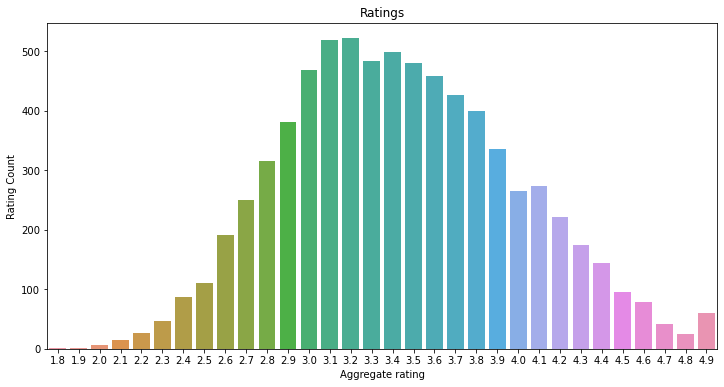

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating', y='Rating Count', data=ratings)
plt.title('Ratings')

In [51]:
data_model.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Count Cuisines,Avg cost,Continent
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314,Phillipines,3.0,77.0,Asia
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591,Phillipines,1.0,84.0,Asia
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270,Phillipines,4.0,280.0,Asia
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365,Phillipines,2.0,105.0,Asia
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229,Phillipines,2.0,105.0,Asia


In [100]:
data_model_for_pred = data_model.drop(['Restaurant ID','City','Restaurant Name','Country Code','Address','Locality','Locality Verbose','Longitude','Latitude',
'Cuisines','Average Cost for two','Currency','Rating color','Rating text','Votes'], axis=1)


In [77]:
data_model_for_pred

,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Country,Count Cuisines,Avg cost,Continent
0,1,0,0,0,3,4.8,Phillipines,3.0,77.000,Asia
1,1,0,0,0,3,4.5,Phillipines,1.0,84.000,Asia
2,1,0,0,0,4,4.4,Phillipines,4.0,280.000,Asia
3,0,0,0,0,4,4.9,Phillipines,2.0,105.000,Asia
4,1,0,0,0,4,4.8,Phillipines,2.0,105.000,Asia
...,...,...,...,...,...,...,...,...,...,...
7398,0,0,0,0,3,4.1,Turkey,1.0,2.800,Europe
7399,0,0,0,0,3,4.2,Turkey,3.0,3.675,Europe
7400,0,0,0,0,4,3.7,Turkey,2.0,5.950,Europe
7401,0,0,0,0,4,4.0,Turkey,1.0,4.200,Europe


In [101]:
X = data_model_for_pred.drop(['Aggregate rating'], axis=1)
y = data_model_for_pred['Aggregate rating']

In [102]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [103]:
X_train.shape

(5182, 9)

In [104]:
X_test.shape

(2221, 9)

In [114]:
X_train.isnull().sum()

Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Count Cuisines          0
Avg cost                0
dtype: int64

In [115]:
X_test.isnull().sum()

Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Count Cuisines          0
Avg cost                0
dtype: int64

In [110]:
y_train.isnull().sum()

0

In [111]:
y_test.isnull().sum()

0

In [112]:
X_train = X_train.fillna(0)

In [113]:
X_test = X_test.fillna(0)

In [88]:
X_train_contr = pd.get_dummies(X_train.Country)
X_test_contr = pd.get_dummies(X_test.Country)

In [89]:
X_train_conti = pd.get_dummies(X_train.Continent)
X_test_conti = pd.get_dummies(X_test.Continent)

In [91]:
X_train = pd.concat([X_train, X_train_contr, X_train_conti], axis=1)
X_test = pd.concat([X_test, X_test_contr, X_test_conti], axis=1)

In [99]:
X_test

,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Count Cuisines,Avg cost,Australia,Brazil,Canada,India,Indonesia,New Zealand,Phillipines,Qatar,Singapore,South Africa,Sri Lanka,Turkey,UAE,United Kingdom,United States,Africa,America,Asia,Australia_continent,Europe
4366,0,0,0,0,1,1.0,1.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3197,0,1,0,0,2,2.0,6.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4367,0,1,0,0,1,3.0,3.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5014,0,1,0,0,2,3.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
554,0,0,0,0,2,3.0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5368,0,0,0,0,2,2.0,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2825,0,0,0,0,1,1.0,4.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
272,0,0,0,0,3,3.0,40.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2042,0,1,0,0,2,1.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [94]:
X_train

,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Count Cuisines,Avg cost,Australia,Brazil,Canada,India,Indonesia,New Zealand,Phillipines,Qatar,Singapore,South Africa,Sri Lanka,Turkey,UAE,United Kingdom,United States,Africa,America,Asia,Australia_continent,Europe,Australia,Brazil,Canada,India,Indonesia,New Zealand,Phillipines,Qatar,Singapore,South Africa,Sri Lanka,Turkey,UAE,United Kingdom,United States,Africa,America,Asia,Australia_continent,Europe
5152,1,0,0,0,4,1.0,25.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3470,0,0,0,0,1,1.0,2.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2579,1,1,0,0,3,3.0,18.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1086,1,1,0,0,3,2.0,15.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6447,0,1,0,0,1,3.0,2.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0,1,0,0,2,1.0,5.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5226,0,1,0,0,1,2.0,3.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5390,0,0,0,0,2,3.0,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
860,0,0,0,0,1,1.0,1.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [116]:
X_train.drop(['Country', 'Continent'], axis=1, inplace=True)
X_test.drop(['Country', 'Continent'], axis=1, inplace=True)

KeyError: "['Country' 'Continent'] not found in axis"

In [117]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [118]:
rfr_pred = rf.predict(X_test)

In [119]:
print("R2 score: ", r2_score(y_test,rfr_pred))

R2 score:  0.3111512880821954


Идеи: 1) поднять get_dummy на уровень всего датафрейма и посмотреть влияение городов и континентов на обучение; 2) категории кухонь посмотреть а не их количество